## STORE COMPLAINTS PREDICTION CHALLENGE 

### PROBLEM STATEMENT
Predicting whether a customer from a particular store will complain, using 30 days transactions data.
### APPROACH 
1. Data Exploration and Visualization
2. Data Cleaning and Feature Engineering 
3. Modelling
4. Conclusion 


#### IMPORTING RELEVANT LIBRARIES AND DATA 

In [249]:
import  pandas as pd, numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt, matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import sklearn.metrics as metrics

pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', 1000)

In [412]:
# importing the data from a csv file 
complaints = pd.read_csv('store_complains_DS Interview Data Set.csv')
complaints.head()


,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender
0,64257fd79a53006421b72c3f,Breakfast,0.0,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,0,0,0,YES,Other,1.0,1.0,Visa,No,no,49,Female
1,64257ffc9a53006421b72c40,Frozen,0.0,536.00,928.00,2023-03-15,2023-03-29,0,1,0,0,0,0,YES,Pickup,3000.0,1.0,Visa,No,no,82,Female
2,642580229a53006421b72c41,Alcohol,0.0,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,0,1,0,NO,Walk In,22000.0,1.0,Visa,No,no,35,Male
3,642580469a53006421b72c42,Baking,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female
4,642580469a53006421b72c42,Alcohol,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female


In [251]:
complaints.shape

(31924, 22)

In [258]:
# describing the data using basic stats
complaints.describe()

,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,amount,quantity,cust_age
count,3.192400e+04,3.192400e+04,3.192400e+04,31924.000000,31924.000000,31924.000000,31924.000000,31924.000000,31924.000000,3.171100e+04,31675.000000,31924.000000
mean,1.137252e+05,6.744151e+05,6.806554e+05,0.242639,0.192488,0.372510,0.002913,0.334263,0.012874,3.136570e+06,3.137889,49.368688
std,4.752873e+06,6.580391e+06,6.771707e+06,1.016028,0.909840,1.345659,0.136032,1.328839,0.294554,3.287700e+08,4.782462,28.832312
min,-5.900000e+03,-1.996793e+05,-1.156700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000
25%,0.000000e+00,4.100000e+03,1.140000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,25.000000
50%,0.000000e+00,4.100000e+03,4.793500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,49.000000
75%,0.000000e+00,1.041000e+05,1.221538e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+04,3.250000,75.000000
max,7.000000e+08,7.000000e+08,7.000000e+08,59.000000,23.000000,27.000000,22.000000,26.000000,16.000000,5.015441e+10,155.000000,99.000000


In [262]:
# checking for duplicates
ids = complaints["customer_registration_number"]
duplicates = complaints[ids.isin(ids[ids.duplicated()])].sort_values("customer_registration_number")
duplicates.shape

(14042, 22)

In [263]:
# exploring the duplicates
duplicates.head()

,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender
3,642580469a53006421b72c42,Baking,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female
4,642580469a53006421b72c42,Alcohol,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female
5,642580469a53006421b72c42,Guns and weaponry,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female
6,642580659a53006421b72c43,Breakfast,0.0,71197.00,3276.00,2023-03-15,2023-03-29,0,0,0,0,0,0,NO,Other,1.0,1.0,Visa,No,no,81,Female
7,642580659a53006421b72c43,Condiment,0.0,71197.00,3276.00,2023-03-15,2023-03-29,0,0,0,0,0,0,NO,Other,1.0,1.0,Visa,No,no,81,Female


In [264]:
complaints[complaints.duplicated(subset=['customer_registration_number','merchandize_category'], keep=False)]

,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender
5231,643aa28a973af85a472c7885,Dairy,0.0,988825.0,153.01,2023-03-27,2023-04-10,3,1,2,0,13,0,NO,sender_mno_Airtel,319050.6,5.142857,Mastercard,Yes,no,46,Female
5232,643aa28a973af85a472c7885,Dairy,0.0,988825.0,153.01,2023-03-27,2023-04-10,3,1,2,0,13,0,NO,Order via website,319050.6,5.142857,Mastercard,Yes,no,46,Female
5233,643aa28a973af85a472c7885,Bread,0.0,988825.0,153.01,2023-03-27,2023-04-10,3,1,2,0,13,0,NO,sender_mno_Airtel,319050.6,5.142857,Mastercard,Yes,no,46,Female
5234,643aa28a973af85a472c7885,Bread,0.0,988825.0,153.01,2023-03-27,2023-04-10,3,1,2,0,13,0,NO,Order via website,319050.6,5.142857,Mastercard,Yes,no,46,Female
5235,643aa28a973af85a472c7885,Cheese & Butter,0.0,988825.0,153.01,2023-03-27,2023-04-10,3,1,2,0,13,0,NO,sender_mno_Airtel,319050.6,5.142857,Mastercard,Yes,no,46,Female
5236,643aa28a973af85a472c7885,Cheese & Butter,0.0,988825.0,153.01,2023-03-27,2023-04-10,3,1,2,0,13,0,NO,Order via website,319050.6,5.142857,Mastercard,Yes,no,46,Female
5237,643aa28a973af85a472c7885,Baking,0.0,988825.0,153.01,2023-03-27,2023-04-10,3,1,2,0,13,0,NO,sender_mno_Airtel,319050.6,5.142857,Mastercard,Yes,no,46,Female
5238,643aa28a973af85a472c7885,Baking,0.0,988825.0,153.01,2023-03-27,2023-04-10,3,1,2,0,13,0,NO,Order via website,319050.6,5.142857,Mastercard,Yes,no,46,Female
5239,643aa28a973af85a472c7885,Frozen,0.0,988825.0,153.01,2023-03-27,2023-04-10,3,1,2,0,13,0,NO,sender_mno_Airtel,319050.6,5.142857,Mastercard,Yes,no,46,Female
5240,643aa28a973af85a472c7885,Frozen,0.0,988825.0,153.01,2023-03-27,2023-04-10,3,1,2,0,13,0,NO,Order via website,319050.6,5.142857,Mastercard,Yes,no,46,Female


In [268]:
print('Ratio of duplicates to the total dataset:',duplicates.shape[0]/ complaints.shape[0])

Ratio of duplicates to the total dataset: 0.43985716075679737


In [413]:

df = complaints.drop_duplicates(subset = ['customer_registration_number'], keep = 'first') 
df.shape
df.set_index('customer_registration_number', inplace=True)

In [275]:
df.head()

,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender
customer_registration_number,,,,,,,,,,,,,,,,,,,,,
64257fd79a53006421b72c3f,Breakfast,0.0,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,0,0,0,YES,Other,1.0,1.0,Visa,No,no,49,Female
64257ffc9a53006421b72c40,Frozen,0.0,536.00,928.00,2023-03-15,2023-03-29,0,1,0,0,0,0,YES,Pickup,3000.0,1.0,Visa,No,no,82,Female
642580229a53006421b72c41,Alcohol,0.0,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,0,1,0,NO,Walk In,22000.0,1.0,Visa,No,no,35,Male
642580469a53006421b72c42,Baking,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female
642580659a53006421b72c43,Breakfast,0.0,71197.00,3276.00,2023-03-15,2023-03-29,0,0,0,0,0,0,NO,Other,1.0,1.0,Visa,No,no,81,Female


### Exploring the dataset further

In [276]:
# Exploring categorical variables 
cat_cols = selector(dtype_include=['category','object'])(df)
for col in cat_cols:
    print(df[col].value_counts(normalize=True)) 

Breakfast                               0.615812
others                                  0.068100
Dairy                                   0.057668
Condiment                               0.043158
Alcohol                                 0.032355
Personal Care                           0.024783
Snack                                   0.024624
Guns and weaponry                       0.024359
Frozen                                  0.023883
Baking                                  0.020599
Candy                                   0.012762
Bread                                   0.011862
Beverage                                0.008155
Meat & Seafood                          0.008049
Deli                                    0.005772
Organic Foods                           0.004025
Canned                                  0.003972
Paper Products and Cleaning Supplies    0.002542
Movies and Cinema                       0.002383
Fresh Fruits                            0.002118
Gluten-Free Foods   

COMMENTS
1. There are 14,042 duplicates with the dataset from the index column with a difference in the merchandize category column
2. The duplicates have been removed under the assumption of data entry errors since all other values in the columns are the same


In [299]:
# outliers check 
df.quantile([0,0.25,0.5,0.75,0.9,1]).T

,0.00,0.25,0.50,0.75,0.90,1.00
amount_deposited_via_counter,-5900.00,0.0,0.000,0.0,0.000,7.000000e+08
amount_deposited_via_card,-199679.26,4100.0,4100.000,93214.0,653029.073,7.000000e+08
balance_on_complaign_date,-11567.00,1193.0,4696.485,113705.0,739975.500,7.000000e+08
restaurant_points,0.00,0.0,0.000,0.0,0.000,5.900000e+01
fuel_points,0.00,0.0,0.000,0.0,0.000,2.300000e+01
groceries_points,0.00,0.0,0.000,0.0,1.000,2.700000e+01
toys_points,0.00,0.0,0.000,0.0,0.000,2.200000e+01
cash_back_points,0.00,0.0,0.000,0.0,0.000,2.600000e+01
electronics,0.00,0.0,0.000,0.0,0.000,1.600000e+01
amount,1.00,1.0,1.000,11000.0,171000.000,5.015441e+10


### VISUALS


In [277]:
def define_hbar_labels(ax, labels, space=5, stacked=False):
    # find the bar information (rectangles characteristics)
    rects = ax.patches
    
    # loop through each rectangle (bar)
    # When stacked, if you want to label ONLY the total, you'll have to loop over the last bars in the chart
    if stacked:
        rects = rects[len(rects) // 2:] # start from half of the rectangles
        for rect, label in zip(rects, labels):
            x_value = rect.get_width() + rect.get_xy()[0] # get_xy()[0] works to get the last x_value (previous bar in the stack)
            y_value = rect.get_y() + rect.get_height() / 2    
            ax.text(x_value + space, y_value, '{:,.0f}'.format(label), ha="left", va="center")
    
    # If not stacked, make sure the number of labels aligns with the number of rectangles
    else:
        for rect, label in zip(rects, labels):
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2
            ax.text(x_value + space, y_value, '{:,.0f}'.format(label), ha="left", va="center")

In [414]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%Y-%m-%d')
df['complaint_date'] = pd.to_datetime(df['complaint_date'], format='%Y-%m-%d')

/var/folders/y8/_3s1n3h551z6pncy1cj46v4m0000gn/T/ipykernel_92867/1359312838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%Y-%m-%d')
/var/folders/y8/_3s1n3h551z6pncy1cj46v4m0000gn/T/ipykernel_92867/1359312838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complaint_date'] = pd.to_datetime(df['complaint_date'], format='%Y-%m-%d')


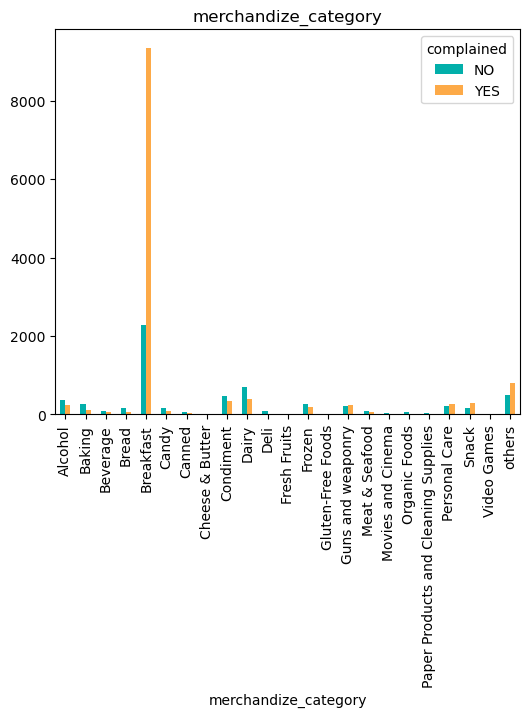

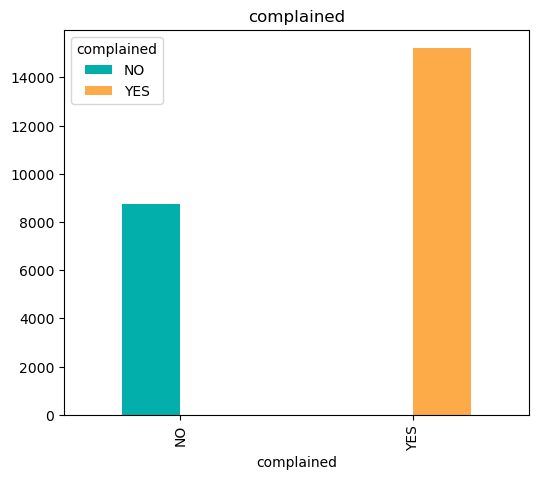

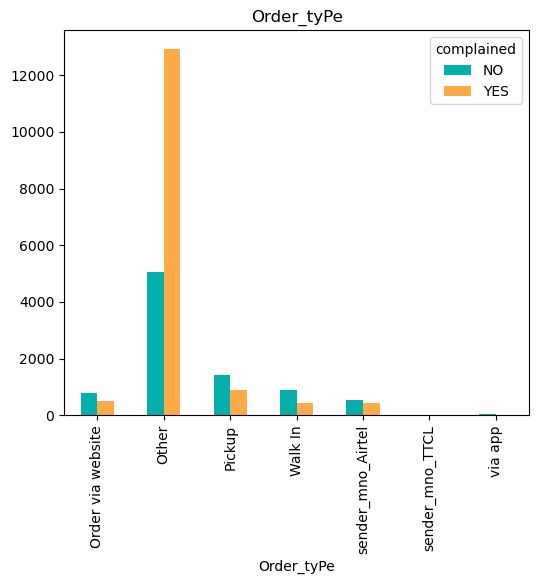

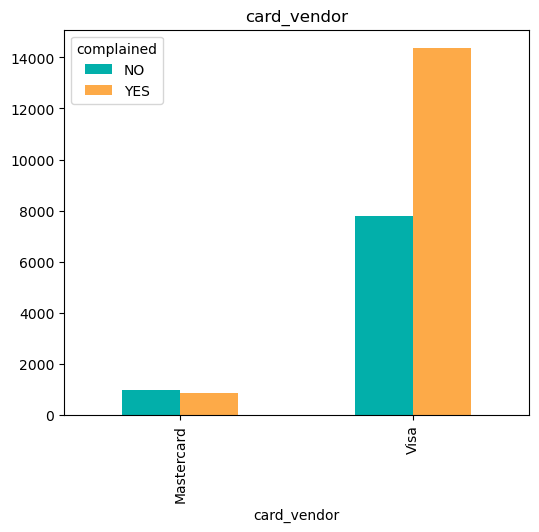

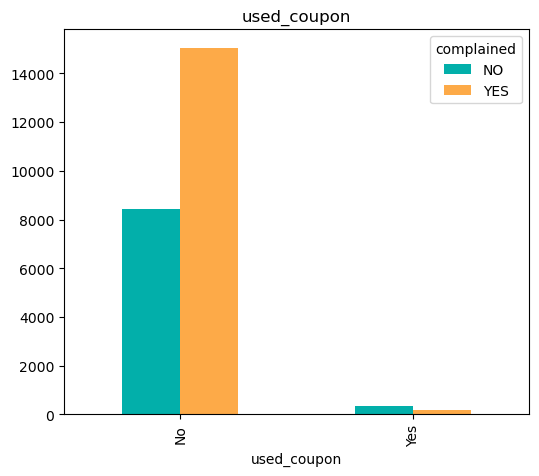

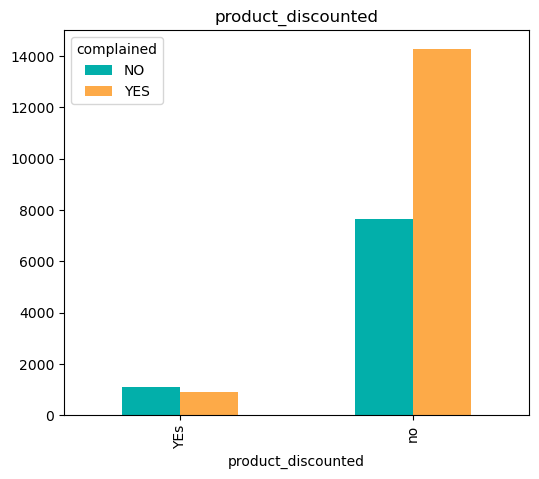

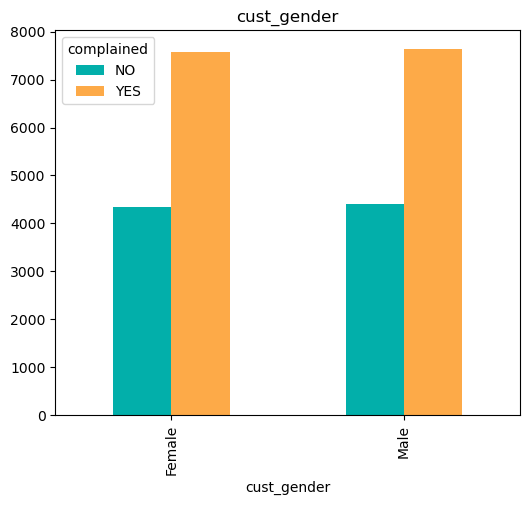

In [282]:
cols = df.select_dtypes(include='object')
colors = ['#02AFAA', '#fdaa48']
for col in cols:
    # print(col)
    temp = pd.crosstab(index=df[col], columns=df.complained)
    temp.plot.bar(stacked=False, figsize=(6, 5),color=colors )
    plt.ylabel('')
    # plt.legend()
    plt.title(col)
    plt.show()

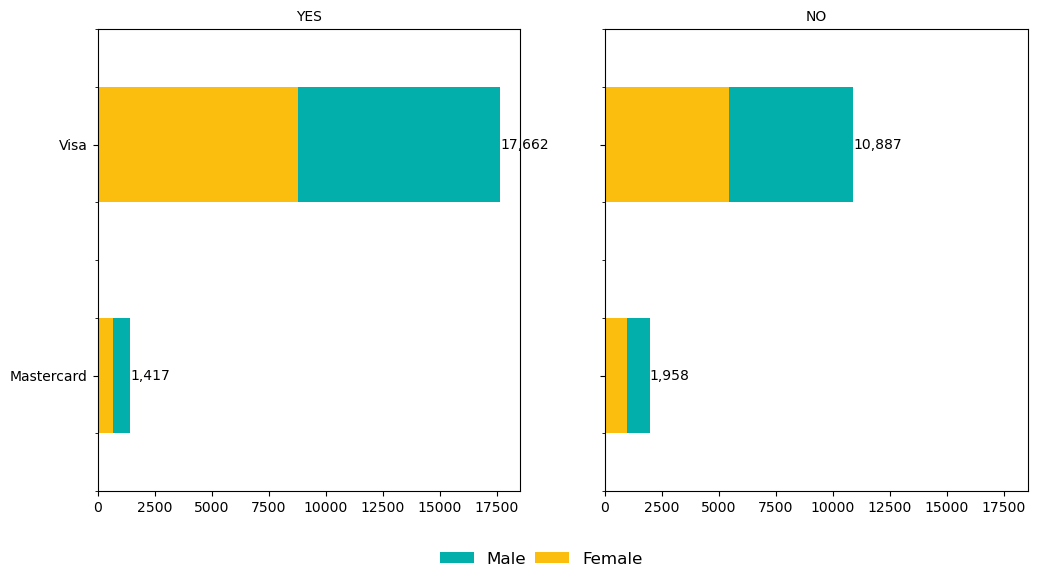

In [ ]:
cmap = LinearSegmentedColormap.from_list('custom', ['#FCBE0E', '#02AFAA'])
bar_dict = {
    'kind':'barh', 'stacked':True, 'legend':False, 'cmap':cmap,}
leg_dict = {
    'bbox_to_anchor':(-0.2, -0.2, .05, .102), 'loc':'best', 'fontsize':'large', 'mode':'expand', 'ncol':2, 'fancybox':False, 'frameon':False}

temp = pd.crosstab(index=df.card_vendor, columns=[df.complained, df.cust_gender], )

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True, sharex=True)
for n, label in enumerate(df.complained.unique()):
    g1 = temp[label].plot(ax=ax[n],  **bar_dict)
    if n == 0: g1.set_ylabel(None)
    if n == 1: g1.legend(**leg_dict)
    g1.set_title(label, size=10)
    labels = temp[label].sum(axis=1).values
    define_hbar_labels(g1, labels, 2, True)
plt.show()

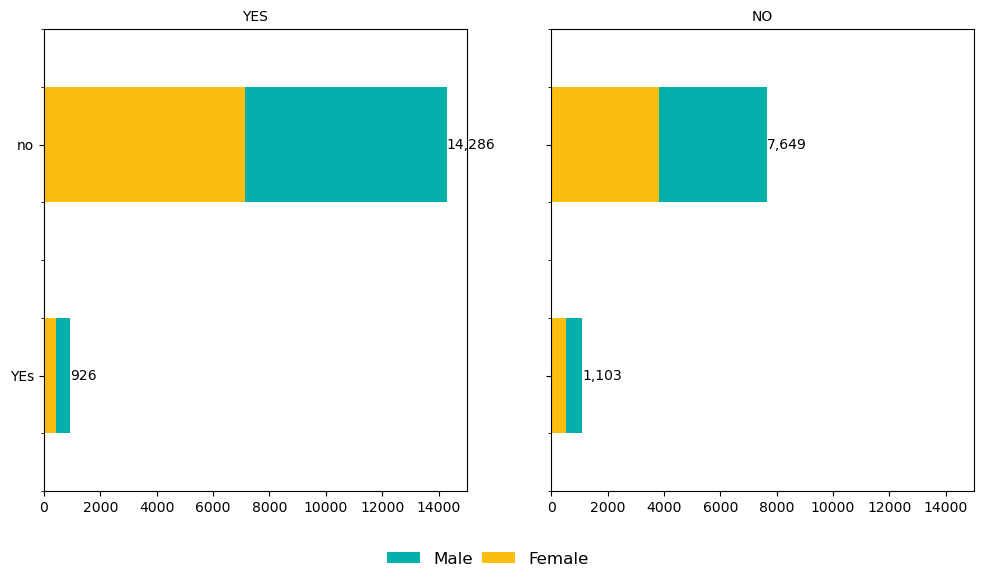

In [283]:
cmap = LinearSegmentedColormap.from_list('custom', ['#FCBE0E', '#02AFAA'])
bar_dict = {
    'kind':'barh', 'stacked':True, 'legend':False, 'cmap':cmap,}
leg_dict = {
    'bbox_to_anchor':(-0.2, -0.2, .05, .102), 'loc':'best', 'fontsize':'large', 'mode':'expand', 'ncol':2, 'fancybox':False, 'frameon':False}

temp = pd.crosstab(index=df.product_discounted, columns=[df.complained, df.cust_gender], )

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True, sharex=True)
for n, label in enumerate(df.complained.unique()):
    g1 = temp[label].plot(ax=ax[n],  **bar_dict)
    if n == 0: g1.set_ylabel(None)
    if n == 1: g1.legend(**leg_dict)
    g1.set_title(label, size=10)
    labels = temp[label].sum(axis=1).values
    define_hbar_labels(g1, labels, 2, True)
plt.show()

#### Check for Nulls 

In [401]:
df.isna().sum()

merchandize_category            5080
amount_deposited_via_counter       0
amount_deposited_via_card          0
balance_on_complaign_date          0
transaction_date                   0
complaint_date                     0
restaurant_points                  0
fuel_points                        0
groceries_points                   0
toys_points                        0
cash_back_points                   0
electronics                        0
complained                         0
Order_tyPe                         0
amount                           162
quantity                         187
card_vendor                        0
used_coupon                        0
product_discounted                 0
cust_age                           0
cust_gender                        0
predictions                        0
dtype: int64

### MODELS 


In [415]:
df.head()

,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender
customer_registration_number,,,,,,,,,,,,,,,,,,,,,
64257fd79a53006421b72c3f,Breakfast,0.0,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,0,0,0,YES,Other,1.0,1.0,Visa,No,no,49,Female
64257ffc9a53006421b72c40,Frozen,0.0,536.00,928.00,2023-03-15,2023-03-29,0,1,0,0,0,0,YES,Pickup,3000.0,1.0,Visa,No,no,82,Female
642580229a53006421b72c41,Alcohol,0.0,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,0,1,0,NO,Walk In,22000.0,1.0,Visa,No,no,35,Male
642580469a53006421b72c42,Baking,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female
642580659a53006421b72c43,Breakfast,0.0,71197.00,3276.00,2023-03-15,2023-03-29,0,0,0,0,0,0,NO,Other,1.0,1.0,Visa,No,no,81,Female


In [286]:
min(df.transaction_date), max(complaints.transaction_date)

(Timestamp('2023-03-15 00:00:00'), '2023-04-21')

In [287]:
min(df.complaint_date),max(complaints.complaint_date)

(Timestamp('2023-03-29 00:00:00'), '2023-05-05')

In [ ]:
complaints["trans_to_complaint"] = (pd.to_datetime(complaints['complaint_date']) - pd.to_datetime(complaints['transaction_date'])).dt.days
complaints.head()

,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender,trans_to_complaint
0,64257fd79a53006421b72c3f,Breakfast,0.0,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,0,0,0,YES,Other,1.0,1.0,Visa,No,no,49,Female,14
1,64257ffc9a53006421b72c40,Frozen,0.0,536.00,928.00,2023-03-15,2023-03-29,0,1,0,0,0,0,YES,Pickup,3000.0,1.0,Visa,No,no,82,Female,14
2,642580229a53006421b72c41,Alcohol,0.0,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,0,1,0,NO,Walk In,22000.0,1.0,Visa,No,no,35,Male,14
3,642580469a53006421b72c42,Baking,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female,14
4,642580469a53006421b72c42,Alcohol,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female,14


### MODELLING

RANDOM FOREST MODEL

In [416]:
# Set variables for the targets and features
from sklearn.model_selection import train_test_split
y = df['complained']
X = df.drop(['complained','merchandize_category'],axis=1)

# Split the data into training and validation sets
train_X, test_X, train_y, test_y = train_test_split( df.drop(['complained','merchandize_category'],axis=1), df['complained'], random_state=17, test_size=0.25)

using a pipeline approach

In [417]:
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('numerical', numerical_transformer, selector(dtype_exclude=['category','object','datetime'])),
        ('categorical', categorical_transformer, selector(dtype_exclude=['category','object','datetime']))
    ]
)

In [418]:
from sklearn.ensemble import RandomForestClassifier


random_forest_pipe =Pipeline(
    steps=[("preprocessor", preprocessor), 
           ('classifier', RandomForestClassifier(random_state=78,  n_estimators=70, 
                                                 min_samples_split=5, max_depth=25 ))
    ])
random_forest_pipe.fit(train_X, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcab9d76f70>),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot

In [419]:
print("Model training score: %.3f" % random_forest_pipe.score(train_X, train_y))
print("Model test score: %.3f" % random_forest_pipe.score(test_X, test_y))

Model training score: 0.757
Model test score: 0.725


In [420]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = random_forest_pipe.predict(test_X)
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

          NO       0.77      0.38      0.51      2228
         YES       0.72      0.93      0.81      3763

    accuracy                           0.73      5991
   macro avg       0.74      0.65      0.66      5991
weighted avg       0.73      0.73      0.70      5991



In [421]:
print(confusion_matrix(test_y, y_pred))

[[ 840 1388]
 [ 257 3506]]


<AxesSubplot:>

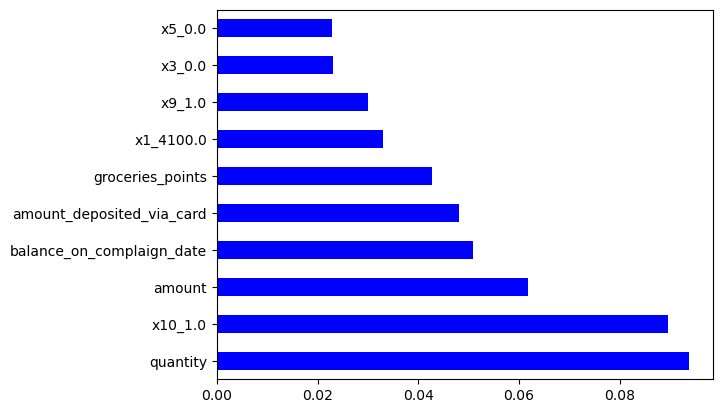

In [430]:
#VARIMP
feat_names = pd.Series(random_forest_pipe.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names())
Xnames = pd.Series(train_X.columns)
featnames = Xnames.drop([3,4,11,14,15,16,18]).append(feat_names, ignore_index=True)
rfeat_imp = pd.Series(random_forest_pipe.named_steps['classifier'].feature_importances_,index=featnames)
rfeat_imp.nlargest(10).plot(kind ='barh', color='blue')


In [440]:
complaints.head()

,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender
0,64257fd79a53006421b72c3f,Breakfast,0.0,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,0,0,0,YES,Other,1.0,1.0,Visa,No,no,49,Female
1,64257ffc9a53006421b72c40,Frozen,0.0,536.00,928.00,2023-03-15,2023-03-29,0,1,0,0,0,0,YES,Pickup,3000.0,1.0,Visa,No,no,82,Female
2,642580229a53006421b72c41,Alcohol,0.0,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,0,1,0,NO,Walk In,22000.0,1.0,Visa,No,no,35,Male
3,642580469a53006421b72c42,Baking,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female
4,642580469a53006421b72c42,Alcohol,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female


COMMENTS
1. The important variables in determining whether a customer will complain are the quantity they bought, whether they bought electronics (electronics points),
the amount spent and their balance on the campaign date.
2. The results indicate that, those with who bought more items, spent more and had deposited/paid via card are less likely to complain

### predicting on all customers 

In [431]:
finaldf = random_forest_pipe.predict(df)
finaldf.shape

(23964,)

In [432]:
df['predictions'] = finaldf

/var/folders/y8/_3s1n3h551z6pncy1cj46v4m0000gn/T/ipykernel_92867/3577541627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predictions'] = finaldf


In [433]:
df.head()

,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender,predictions
customer_registration_number,,,,,,,,,,,,,,,,,,,,,,
64257fd79a53006421b72c3f,Breakfast,0.0,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,0,0,0,YES,Other,1.0,1.0,Visa,No,no,49,Female,YES
64257ffc9a53006421b72c40,Frozen,0.0,536.00,928.00,2023-03-15,2023-03-29,0,1,0,0,0,0,YES,Pickup,3000.0,1.0,Visa,No,no,82,Female,YES
642580229a53006421b72c41,Alcohol,0.0,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,0,1,0,NO,Walk In,22000.0,1.0,Visa,No,no,35,Male,YES
642580469a53006421b72c42,Baking,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female,NO
642580659a53006421b72c43,Breakfast,0.0,71197.00,3276.00,2023-03-15,2023-03-29,0,0,0,0,0,0,NO,Other,1.0,1.0,Visa,No,no,81,Female,YES


### SAVING THE PREDICTIONS COLUMN ALONGSIDE THE DATASET

COMMENTS
1. The final file contains 23964 records since we removed duplicates 
2. The predictions column contains the results for the whole dataset.

In [434]:
df.to_csv('store_complaints_results.csv')

## THE END 

## DUMP FOR OTHER CODES

In [ ]:
# Calculate the accuracy as our performance metric
import sklearn.metrics as metrics
accuracy1 = metrics.accuracy_score(test_y, ypred)
accuracy2 = metrics.accuracy_score(train_y, ytrain)
print("Accuracy: ", accuracy1)
print("Accuracy: ", accuracy2)


Accuracy:  0.8553069247051709
Accuracy:  0.9849301950506527


## AUTOML

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
complaints.head()

,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender,trans_to_complaint
0,64257fd79a53006421b72c3f,Breakfast,0.0,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,0,0,0,YES,Other,1.0,1.0,Visa,No,no,49,Female,14
1,64257ffc9a53006421b72c40,Frozen,0.0,536.00,928.00,2023-03-15,2023-03-29,0,1,0,0,0,0,YES,Pickup,3000.0,1.0,Visa,No,no,82,Female,14
2,642580229a53006421b72c41,Alcohol,0.0,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,0,1,0,NO,Walk In,22000.0,1.0,Visa,No,no,35,Male,14
3,642580469a53006421b72c42,Baking,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female,14
4,642580469a53006421b72c42,Alcohol,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female,14


In [ ]:
autodf = complaints.drop(['customer_registration_number','transaction_date','complaint_date'], axis=1)
#.select_dtypes(exclude='datetime')
autodf.columns

Index(['merchandize_category', 'amount_deposited_via_counter',
       'amount_deposited_via_card', 'balance_on_complaign_date',
       'restaurant_points', 'fuel_points', 'groceries_points', 'toys_points',
       'cash_back_points', 'electronics', 'complained', 'Order_tyPe', 'amount',
       'quantity', 'card_vendor', 'used_coupon', 'product_discounted',
       'cust_age', 'cust_gender', 'trans_to_complaint'],
      dtype='object')

In [ ]:
autodf.head()

,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender,trans_to_complaint
0,Breakfast,0.0,779.00,1272.00,0,0,0,0,0,0,YES,Other,1.0,1.0,Visa,No,no,49,Female,14
1,Frozen,0.0,536.00,928.00,0,1,0,0,0,0,YES,Pickup,3000.0,1.0,Visa,No,no,82,Female,14
2,Alcohol,0.0,330225.00,177850.00,0,0,0,0,1,0,NO,Walk In,22000.0,1.0,Visa,No,no,35,Male,14
3,Baking,0.0,6215561.04,301542.04,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female,14
4,Alcohol,0.0,6215561.04,301542.04,3,0,1,0,1,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female,14


In [ ]:
train, test = train_test_split(autodf, random_state=890, test_size=0.2)

In [ ]:
train.shape

(25539, 20)

In [ ]:
complaints.shape

(31924, 23)

In [ ]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_371"; Java(TM) SE Runtime Environment (build 1.8.0_371-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.371-b11, mixed mode)
  Starting server from /Users/admin/opt/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/y8/_3s1n3h551z6pncy1cj46v4m0000gn/T/tmpoymk2ukl
  JVM stdout: /var/folders/y8/_3s1n3h551z6pncy1cj46v4m0000gn/T/tmpoymk2ukl/h2o_admin_started_from_python.out
  JVM stderr: /var/folders/y8/_3s1n3h551z6pncy1cj46v4m0000gn/T/tmpoymk2ukl/h2o_admin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Africa/Dar_es_Salaam
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 8 days
H2O_cluster_name:,H2O_from_python_admin_1wzrye
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.770 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [ ]:
train_h2o =h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Identify predictors and response
x = train_h2o.columns
y = "complained"
x.remove(y)


In [ ]:
train[y].head()

29745    YES
22689    YES
6849      NO
12280    YES
8369      NO
Name: complained, dtype: object

In [ ]:

# For binary classification, response should be a factor
train_h2o[y] = train_h2o[y].asfactor()
test_h2o[y] = test_h2o[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train_h2o, validation_frame =test_h2o)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows) 

AutoML progress: |
14:48:41.310: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
14:48:41.922: _train param, Dropping bad and constant columns: [trans_to_complaint]

██
14:48:54.256: _train param, Dropping bad and constant columns: [trans_to_complaint]

██
14:49:02.636: _train param, Dropping bad and constant columns: [trans_to_complaint]

█
14:49:13.508: _train param, Dropping bad and constant columns: [trans_to_complaint]


14:49:21.89: _train param, Dropping bad and constant columns: [trans_to_complaint]

██
14:49:31.779: _train param, Dropping bad and constant columns: [trans_to_complaint]

█
14:49:38.862: _train param, Dropping bad and constant columns: [trans_to_complaint]

█
14:49:44.896: _train param, Dropping bad and constant columns: [trans_to_complaint]

█
14:49:51.184

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20230605_144841,0.855859,0.447576,0.870909,0.232218,0.378752,0.143453
StackedEnsemble_BestOfFamily_1_AutoML_1_20230605_144841,0.855614,0.44791,0.870509,0.229879,0.378832,0.143514
XGBoost_grid_1_AutoML_1_20230605_144841_model_2,0.852579,0.454399,0.866739,0.230522,0.381217,0.145327
XGBoost_grid_1_AutoML_1_20230605_144841_model_1,0.84307,0.468902,0.86119,0.258848,0.389305,0.151558
GBM_grid_1_AutoML_1_20230605_144841_model_1,0.842186,0.468483,0.861591,0.245149,0.389838,0.151973
XGBoost_grid_1_AutoML_1_20230605_144841_model_3,0.842036,0.46852,0.858582,0.251362,0.389637,0.151817
XGBoost_2_AutoML_1_20230605_144841,0.841493,0.470788,0.857264,0.253373,0.389805,0.151948
XGBoost_1_AutoML_1_20230605_144841,0.83771,0.47732,0.855437,0.250133,0.392764,0.154264
XGBoost_3_AutoML_1_20230605_144841,0.836614,0.476218,0.854972,0.261753,0.393902,0.155158
XRT_1_AutoML_1_20230605_144841,0.836145,0.481929,0.853917,0.263163,0.395253,0.156225


In [ ]:
top_algo = h2o.get_model("StackedEnsemble_AllModels_1_AutoML_1_20230605_144841")

In [ ]:
top_algo.accuracy(valid=True, train=True)

{'train': [[0.5466309572486484, 0.9059410883674488]],
 'valid': [[0.45552883596566535, 0.8089271730618638]]}

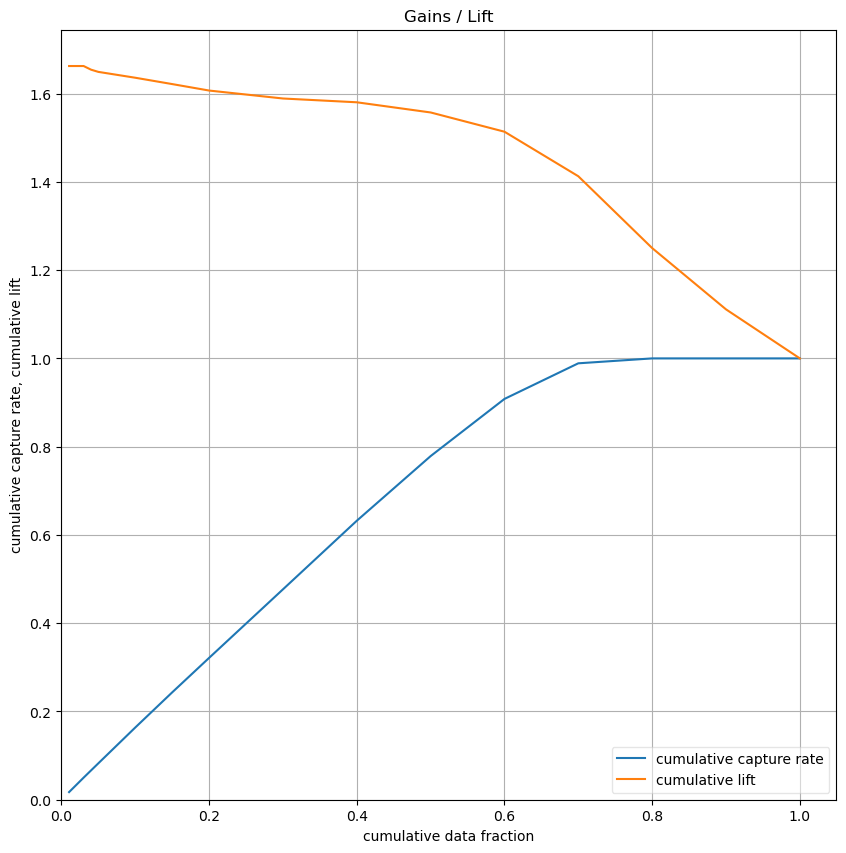

group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0103844,0.9540245,1.6625166,1.6625166,1.0,0.9591147,1.0,0.9591147,0.0172643,0.0172643,66.2516600,66.2516600,0.0172643
2,0.0200699,0.9470694,1.6625166,1.6625166,1.0,0.9506104,1.0,0.9550106,0.0161023,0.0333665,66.2516600,66.2516600,0.0333665
3,0.0300549,0.9420793,1.6625166,1.6625166,1.0,0.9443589,1.0,0.9514718,0.0166003,0.0499668,66.2516600,66.2516600,0.0499668
4,0.0401398,0.9384124,1.6295955,1.6542454,0.9801980,0.9405189,0.9950249,0.9487200,0.0164343,0.0664011,62.9595479,65.4245373,0.0658999
5,0.0500250,0.9340467,1.6289304,1.6492430,0.9797980,0.9362791,0.9920160,0.9462616,0.0161023,0.0825033,62.8930406,64.9243015,0.0815011
6,0.1000499,0.9198241,1.6226958,1.6359694,0.9760479,0.9265314,0.9840319,0.9363965,0.0811753,0.1636786,62.2695843,63.5969429,0.1596696
7,0.1500749,0.9069305,1.5928303,1.6215897,0.9580838,0.9136886,0.9753826,0.9288272,0.0796813,0.2433599,59.2830276,62.1589711,0.2340890
8,0.2000999,0.8947412,1.5629647,1.6069335,0.9401198,0.9011943,0.9665669,0.9219190,0.0781873,0.3215471,56.2964708,60.6933460,0.3047594
9,0.3000499,0.8636977,1.5529001,1.5889343,0.9340659,0.8798832,0.9557404,0.9079164,0.1552125,0.4767596,55.2900121,58.8934335,0.4434346
10,0.4,0.8169486,1.5545610,1.5803453,0.9350649,0.8416065,0.9505741,0.8913472,0.1553785,0.6321381,55.4560977,58.0345286,0.5825265


In [ ]:
top_algo.gains_lift_plot()

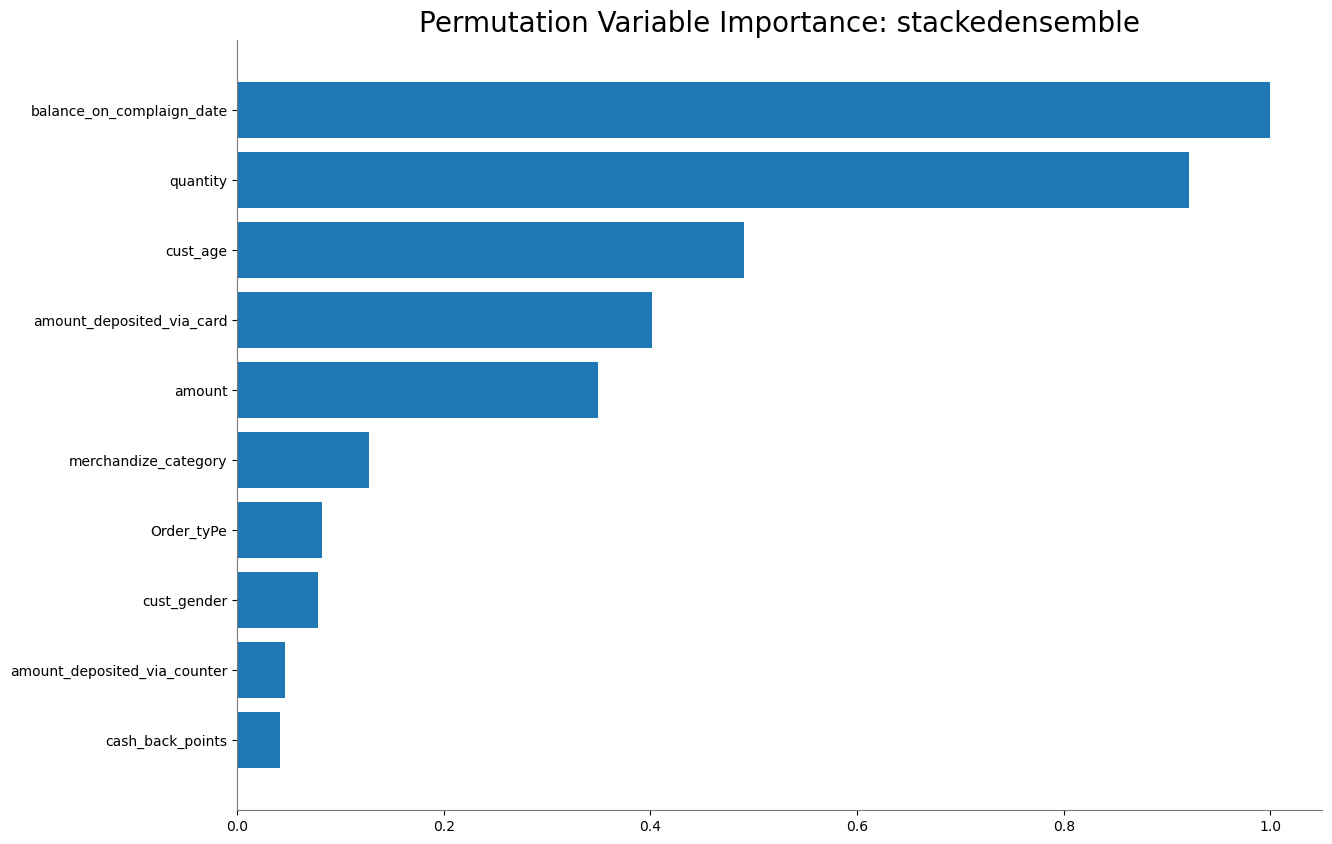

Variable,Relative Importance,Scaled Importance,Percentage
balance_on_complaign_date,0.1076794,1.0,0.2741116
quantity,0.0992362,0.9215893,0.2526183
cust_age,0.0527774,0.4901343,0.1343515
amount_deposited_via_card,0.0432052,0.4012392,0.1099843
amount,0.0376538,0.3496847,0.0958526
merchandize_category,0.0137854,0.1280224,0.0350924
Order_tyPe,0.0088195,0.0819050,0.0224511
cust_gender,0.0083878,0.0778956,0.0213521
amount_deposited_via_counter,0.0050106,0.0465330,0.0127552
cash_back_points,0.0044268,0.0411112,0.0112691


In [ ]:
top_algo.permutation_importance_plot(train_h2o)

In [ ]:
top_algo.model_performance(valid=True)

ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.1394114956491348
RMSE: 0.3733784884659731
LogLoss: 0.4376536395007485
AUC: 0.8610074540843771
AUCPR: 0.87604422317605
Gini: 0.7220149081687541
Null degrees of freedom: 6384
Residual degrees of freedom: 6378
Null deviance: 8579.898423926426
Residual deviance: 5588.836976424558
AIC: 5602.836976424558

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44214907046367763
       NO    YES    Error    Rate
-----  ----  -----  -------  ---------------
NO     1620  915    0.3609   (915.0/2535.0)
YES    307   3543   0.0797   (307.0/3850.0)
Total  1927  4458   0.1914   (1222.0/6385.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.442149     0.852913  237
max f2                       0.174689     0.916023  326
max f0point5                 0.609269     0.834651  181
max accuracy                 0.455529     0.808927  233
max precision                0.973123     1         0
max recall                   0.00933038   1         396
max specificity              0.973123     1         0
max absolute_mcc             0.455529     0.596232  233
max min_per_class_accuracy   0.650573     0.78146   164
max mean_per_class_accuracy  0.580266     0.791121  191
max tns                      0.973123     2535      0
max fns                      0.973123     3849      0
max fps                      0.000649807  2535      399
max tps                      0.00933038   3850      396
max tnr                      0.973123     1         0
max fnr                      0.973123     0.99974   0
max fpr                      0.000649807  1         399
max tpr                      0.00933038   1         396

Gains/Lift Table: Avg response rate: 60.30 %, avg score: 59.79 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100235                   0.952695           1.55479    1.55479            0.9375           0.95758    0.9375                      0.95758             0.0155844       0.0155844                  55.4789   55.4789            0.0140065
2        0.020047                    0.946823           1.60662    1.5807             0.96875          0.949743   0.953125                    0.953662            0.0161039       0.0316883                  60.6615   58.0702            0.0293214
3        0.0300705                   0.941867           1.39931    1.52024            0.84375          0.944184   0.916667                    0.950502            0.014026        0.0457143                  39.931    52.0238            0.0394026
4        0.040094                    0.93765            1.55479    1.52888            0.9375           0.939773   0.921875                    0.94782             0.0155844       0.0612987                  55.4789   52.8876            0.0534092
5        0.0501175                   0.933706           1.50296    1.52369            0.90625          0.935347   0.91875                     0.945325            0.0150649       0.0763636                  50.2963   52.3693            0.0661072
6        0.100078                    0.918345           1.50767    1.5157             0.909091         0.925306   0.913928                    0.935331            0.0753247       0.151688                   50.7674   51.5696            0.129992
7        0.150039                    0.903542           1.50767    1.51302            0.909091         0.910681   0.91